<a href="https://colab.research.google.com/github/rawar/tensorflow-notebooks/blob/master/lstm_sentiment_detection_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


In [0]:
url = 'https://gist.githubusercontent.com/rawar/3d5343ce39dd16bc457ef4ae56c87f4a/raw/6e6c150745de44e002f0b7fb435d0ccd1e10faa7/yelp-sentiment-data.csv'
sentiment_data = pd.read_csv(url)

In [23]:
sentiment_data.head(5)

,Unnamed: 0,stars,text,sentiment
0,0,5.0,hands down best bloody mary ever so many thing...,pos
1,1,5.0,its true this hotel carries you while in vegas...,pos
2,2,4.0,first time lemme not exaggerate but yo nothin...,pos
3,3,4.0,sushisamba had very tasty sushis my table and ...,pos
4,4,5.0,good food nice setting jazz ambience\n\nmade f...,pos


In [0]:
sentiment_data = sentiment_data.dropna()

In [30]:
print(sentiment_data['text'].values)

['hands down best bloody mary ever so many things in my bm veggies  mmm bacon  nailed it its an appetizer i also had the burger with fries who knew fries could be so good the presentation doesnt disappoint ether very nice great seating outside although we sat inside would love to see this restaurant near my hometown seriously get the bm you rock guy'
 'its true this hotel carries you while in vegas we visited the venetian to experience the awesome interior and romantic evening events the entire hotel sparkled its huge too  weekendinvegas'
 'first time  lemme not exaggerate but yo nothing but love and fun cups full and aint nothing but love nothing but good vibes tonight some people dapper some people coolin all age groups people eating'
 ...
 'if i could give this place  stars i would handsdown the best service ive received at a shisha spot worldwide \n\ni was taken care of from the moment i walked in to when i walked out the staff were so attentive and checked on me nonstop they def k

In [0]:
sentiment_data = sentiment_data.applymap(lambda x: x.strip() if type(x)==str else x)

In [0]:
vocab_size = 4700

In [0]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, lower=False, split=" ")

In [0]:
tokenizer.fit_on_texts(sentiment_data['text'].values)

In [44]:
print('Number of words: %d' % len(tokenizer.word_index))

Number of words: 25474


In [0]:
X = tokenizer.texts_to_sequences(sentiment_data['text'].values)

In [0]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [48]:
embed_dim = 128
lstm_out = 196

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = X.shape[1]))
model.add(tf.keras.layers.LSTM(lstm_out, dropout = 0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax')) # classification layer with two classes (neg, pos)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = X.shape[1]),
    tf.keras.layers.LSTM(lstm_out, dropout = 0.2),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.LSTM(units = 50, return_sequences = True),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.LSTM(units = 50, return_sequences = True),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.LSTM(units = 50),
#    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Dense(units = 1)
#])

W0414 08:22:33.549618 140145062627200 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f759f9d0860>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0414 08:22:33.615246 140145062627200 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 888, 128)          601600    
_________________________________________________________________
unified_lstm (UnifiedLSTM)   (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 856,794
Trainable params: 856,794
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
Y = pd.get_dummies(sentiment_data['sentiment']).values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [0]:
num_epochs = 10
batch_size = 32

In [52]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = num_epochs, verbose = 2)

Epoch 1/10
5251/5251 - 31s - loss: 0.5060 - accuracy: 0.7461
Epoch 2/10
5251/5251 - 28s - loss: 0.2778 - accuracy: 0.8886
Epoch 3/10
5251/5251 - 28s - loss: 0.1875 - accuracy: 0.9284
Epoch 4/10
5251/5251 - 28s - loss: 0.1305 - accuracy: 0.9566
Epoch 5/10
5251/5251 - 28s - loss: 0.0738 - accuracy: 0.9747
Epoch 6/10
5251/5251 - 28s - loss: 0.0639 - accuracy: 0.9779
Epoch 7/10
5251/5251 - 28s - loss: 0.0545 - accuracy: 0.9821
Epoch 8/10
5251/5251 - 28s - loss: 0.0902 - accuracy: 0.9690
Epoch 9/10
5251/5251 - 28s - loss: 0.0275 - accuracy: 0.9918
Epoch 10/10
5251/5251 - 28s - loss: 0.0249 - accuracy: 0.9930


In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

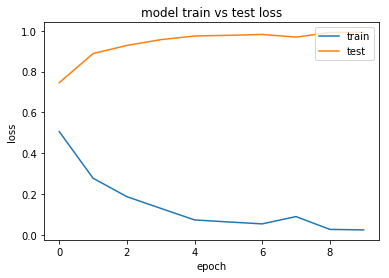

In [55]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model train vs test loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper right')
pyplot.show()

In [56]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

1313/1313 - 3s - loss: 0.9011 - accuracy: 0.8088
Score: 0.90
Validation Accuracy: 0.81


In [57]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_test)):
    
    result = model.predict(X_test[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
    
    if np.argmax(result) == np.argmax(Y_test[x]):
        if np.argmax(Y_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
            
    if np.argmax(Y_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

In [58]:
print("pos_acc: %.2f" % (pos_correct/pos_cnt*100))
print("neg_acc: %.2f" % (neg_correct/neg_cnt*100))

pos_acc: 87.29
neg_acc: 69.73


In [59]:
xtest = X_test[1].reshape(1,X_test.shape[1])
print(xtest)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [0]:
# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    words = []
    # Looking up words in dictionary
    #words = [reverse_word_map.get(letter) for letter in list_of_indices]
    for letter in list_of_indices:
        w = reverse_word_map.get(letter)
        if(w != None):
            words.append(w)
    return(words)

In [0]:
xtest_str = list(map(sequence_to_text, xtest))

In [62]:
yresult = model.predict(xtest)
print("words=%s, predicted sentiment=%s" % (xtest_str, yresult))

words=[['i', 'took', 'my', 'family', 'of', 'here', 'while', 'we', 'were', 'all', 'in', 'town', 'on', 'vacation', 'i', 'love', 'the', 'atmosphere', 'and', 'the', 'cocktails', 'are', 'amazing', 'i', 'had', 'reserved', 'a', 'table', 'online', 'several', 'months', 'in', 'advance', 'and', 'everything', 'was', 'ready', 'for', 'us', 'once', 'we', 'arrived', 'we', 'were', 'all', 'seated', 'and', 'served', 'promptly', 'the', 'service', 'was', 'excellent', 'i', 'tipped', 'over', 'the', 'added', 'as', 'they', 'just', 'did', 'that', 'good', 'of', 'a', 'job', 'taking', 'care', 'of', 'everyone', 'would', 'have', 'been', 'stars', 'had', 'the', 'food', 'the', 'amazing', 'atmosphere', 'and', 'cocktails', 'we', 'were', 'all', 'by', 'the', 'food', 'but', 'will', 'definitely', 'be', 'back', 'again', 'and', 'again', 'even', 'if', 'its', 'just', 'for', 'cocktails']], predicted sentiment=[[0.00519594 0.9948041 ]]


In [66]:
result = model.predict_classes(xtest)
print(result)

[1]


In [67]:
yhat = model.predict_proba(xtest) 
print(yhat)

[[0.00519594 0.9948041 ]]
